In [8]:
# 부수적인 요소
# %%
# 데이터프레임 병합
# Ipyhton 디스플레이 설정 변경
import pandas as pd
pd.set_option("display.max_columns",10) # 출력할 최대 열의 개수
pd.set_option("display.max_colwidth",20) # 출력할 열의 너비
pd.set_option("display.unicode.east_asian_width",True) # 유니코드 사용 너비 조정


##데이터프레임 병합

In [9]:
# SQL JOIN 유사 = 좌우 병합 = merge()
# 공통된 열, 인덱스 = 키
# 라이브러리 불러오기
import pandas as pd
# 데이터 불러오기
df1 = pd.read_excel("/content/drive/MyDrive/BDA/part6/stock price.xlsx",engine="openpyxl")
df2 = pd.read_excel("/content/drive/MyDrive/BDA/part6/stock valuation.xlsx",engine="openpyxl")
print(df1)
print("\n")
print(df2)
print("\n")

       id    stock_name          value   price
0  128940      한미약품   59385.666667  421000
1  130960        CJ E&M   58540.666667   98900
2  138250    엔에스쇼핑   14558.666667   13200
3  139480        이마트  239230.833333  254500
4  142280  녹십자엠에스     468.833333   10200
5  145990        삼양사   82750.000000   82000
6  185750        종근당   40293.666667  100500
7  192400    쿠쿠홀딩스  179204.666667  177500
8  199800          툴젠   -2514.333333  115400
9  204210  모두투어리츠    3093.333333    3475


       id              name           eps     bps        per       pbr
0  130960            CJ E&M   6301.333333   54068  15.695091  1.829178
1  136480              하림    274.166667    3551  11.489362  0.887074
2  138040    메리츠금융지주   2122.333333   14894   6.313806  0.899691
3  139480            이마트  18268.166667  295780  13.931338  0.860437
4  145990            삼양사   5741.000000  108090  14.283226  0.758627
5  161390        한국타이어   5648.500000   51341   7.453306  0.820007
6  181710   NHN엔터테인먼트   2110.166667   784

In [10]:
# inner join, 공통된 열은 id
# pd.merge(df1,df2, how = "inner", on = "id")
merge_inner = pd.merge(df1,df2) # 기본값은 how = "inner", on = None
print(merge_inner)

# full outer join
merge_outer = pd.merge(df1,df2, how = "outer", on = "id")
print(merge_outer)

       id    stock_name          value   price          name           eps  \
0  130960        CJ E&M   58540.666667   98900        CJ E&M   6301.333333   
1  139480        이마트  239230.833333  254500        이마트  18268.166667   
2  145990        삼양사   82750.000000   82000        삼양사   5741.000000   
3  185750        종근당   40293.666667  100500        종근당   3990.333333   
4  204210  모두투어리츠    3093.333333    3475  모두투어리츠     85.166667   

      bps        per       pbr  
0   54068  15.695091  1.829178  
1  295780  13.931338  0.860437  
2  108090  14.283226  0.758627  
3   40684  25.185866  2.470259  
4    5335  40.802348  0.651359  
        id    stock_name          value     price              name  \
0   128940      한미약품   59385.666667  421000.0               NaN   
1   130960        CJ E&M   58540.666667   98900.0            CJ E&M   
2   138250    엔에스쇼핑   14558.666667   13200.0               NaN   
3   139480        이마트  239230.833333  254500.0            이마트   
4   142280  녹십자엠에스     

In [11]:
# left join
merge_left = pd.merge(df1,df2, how = "left", 
                      left_on = "stock_name", right_on = "name")
print(merge_left)

# right join
merge_right = pd.merge(df1,df2, how = "right", 
                      left_on = "stock_name", right_on = "name")
print(merge_right)

# 원하는 조건을 만족하는 불 인덱스와 merge
df_price = df1[df1["price"] < 100000]
data = pd.merge(df_price, df2)
print(data)

     id_x    stock_name          value   price      id_y          name  \
0  128940      한미약품   59385.666667  421000       NaN           NaN   
1  130960        CJ E&M   58540.666667   98900  130960.0        CJ E&M   
2  138250    엔에스쇼핑   14558.666667   13200       NaN           NaN   
3  139480        이마트  239230.833333  254500  139480.0        이마트   
4  142280  녹십자엠에스     468.833333   10200       NaN           NaN   
5  145990        삼양사   82750.000000   82000  145990.0        삼양사   
6  185750        종근당   40293.666667  100500  185750.0        종근당   
7  192400    쿠쿠홀딩스  179204.666667  177500       NaN           NaN   
8  199800          툴젠   -2514.333333  115400       NaN           NaN   
9  204210  모두투어리츠    3093.333333    3475  204210.0  모두투어리츠   

            eps       bps        per       pbr  
0           NaN       NaN        NaN       NaN  
1   6301.333333   54068.0  15.695091  1.829178  
2           NaN       NaN        NaN       NaN  
3  18268.166667  295780.0  13.931338  0.8

In [12]:
# %%
# 데이터프레임 합치기(merge) - 교집합
merge_inner = pd.merge(df1,df2)
print(merge_inner)

# 데이터프레임 합치기(merge) - 합집합
merge_outer = pd.merge(df1,df2,how="outer",on="id")
print(merge_outer)

# 데이터프레임 합치기(merge) - 왼쪽 데이터프레임 기준, 키 값 분리
merge_left = pd.merge(df1,df2,how="left",left_on="stock_name",right_on="name")
print(merge_left)

       id    stock_name          value   price          name           eps  \
0  130960        CJ E&M   58540.666667   98900        CJ E&M   6301.333333   
1  139480        이마트  239230.833333  254500        이마트  18268.166667   
2  145990        삼양사   82750.000000   82000        삼양사   5741.000000   
3  185750        종근당   40293.666667  100500        종근당   3990.333333   
4  204210  모두투어리츠    3093.333333    3475  모두투어리츠     85.166667   

      bps        per       pbr  
0   54068  15.695091  1.829178  
1  295780  13.931338  0.860437  
2  108090  14.283226  0.758627  
3   40684  25.185866  2.470259  
4    5335  40.802348  0.651359  
        id    stock_name          value     price              name  \
0   128940      한미약품   59385.666667  421000.0               NaN   
1   130960        CJ E&M   58540.666667   98900.0            CJ E&M   
2   138250    엔에스쇼핑   14558.666667   13200.0               NaN   
3   139480        이마트  239230.833333  254500.0            이마트   
4   142280  녹십자엠에스     

In [13]:
# %%
# 데이터프레임 합치기(merge) - 오른쪽 데이터프레임 기준, 키 값 분리
merge_right = pd.merge(df1,df2,how="right",left_on="stock_name",right_on="name")
print(merge_right)

# 불린 인덱싱과 결합하여 원하는 데이터 찾기
price = df1[df1["price"]<50000]
print(price.head())
print("\n")

value=pd.merge(price,df2)
print(value)

       id_x    stock_name          value     price    id_y              name  \
0  130960.0        CJ E&M   58540.666667   98900.0  130960            CJ E&M   
1       NaN           NaN            NaN       NaN  136480              하림   
2       NaN           NaN            NaN       NaN  138040    메리츠금융지주   
3  139480.0        이마트  239230.833333  254500.0  139480            이마트   
4  145990.0        삼양사   82750.000000   82000.0  145990            삼양사   
5       NaN           NaN            NaN       NaN  161390        한국타이어   
6       NaN           NaN            NaN       NaN  181710   NHN엔터테인먼트   
7  185750.0        종근당   40293.666667  100500.0  185750            종근당   
8  204210.0  모두투어리츠    3093.333333    3475.0  204210      모두투어리츠   
9       NaN           NaN            NaN       NaN  207940  삼성바이오로직스   

            eps     bps        per       pbr  
0   6301.333333   54068  15.695091  1.829178  
1    274.166667    3551  11.489362  0.887074  
2   2122.333333   14894   6.313806  

#데이터 프레임 합치기(결합)

In [14]:
# %%
# 데이터프레임 합치기(join)

pd.set_option("display.max_columns",10) # 출력할 최대 열의 개수 
pd.set_option("display.max_colwidth",20) # 출력할 열의 너비
pd.set_option("display.unicode.east_asian_width",True) # 유니코드 사용 너비 조정

# 주식 데이터를 가져와서 데이터프레임 만들기
# merge 와 유사하지만 공통된 행 인덱스 기준으로 결합
# 옵션을 지정하면 열 기준으로
df1=pd.read_excel("/content/drive/MyDrive/BDA/part6/stock price.xlsx",index_col="id",engine="openpyxl")
df2=pd.read_excel("/content/drive/MyDrive/BDA/part6/stock valuation.xlsx",index_col="id",engine="openpyxl")

# 데이터 프레임 결합(join)
df3 = df1.join(df2)
print(df3)

# 데이터 프레임 결합(join) - 교집합
df4 = df1.join(df2,how="inner")
print(df4)



          stock_name          value   price          name           eps  \
id                                                                        
128940      한미약품   59385.666667  421000           NaN           NaN   
130960        CJ E&M   58540.666667   98900        CJ E&M   6301.333333   
138250    엔에스쇼핑   14558.666667   13200           NaN           NaN   
139480        이마트  239230.833333  254500        이마트  18268.166667   
142280  녹십자엠에스     468.833333   10200           NaN           NaN   
145990        삼양사   82750.000000   82000        삼양사   5741.000000   
185750        종근당   40293.666667  100500        종근당   3990.333333   
192400    쿠쿠홀딩스  179204.666667  177500           NaN           NaN   
199800          툴젠   -2514.333333  115400           NaN           NaN   
204210  모두투어리츠    3093.333333    3475  모두투어리츠     85.166667   

             bps        per       pbr  
id                                     
128940       NaN        NaN       NaN  
130960   54068.0  15.695091  1.

#그룹연산

##그룹 객체 만들기

In [15]:
# %%
# 데이터프레임 객체.groupby(그룹화에 사용할 열) => 그룹 객체
# 그룹 연산 - 분할
import seaborn as sns
titanic = sns.load_dataset("titanic")
df = titanic.loc[:, ["age","sex","class","fare","survived"]]

print("승객 수:", len(df))
print(df.head())

# class 열을 기준으로 분할
grouped = df.groupby(["class"])
print(grouped)

# 그룹 객체를 iteration으로 출력: head() 메소드로 첫 5행만을 출력
for key, group in grouped:
    print("* key :",key)
    print("* number :", len(group))
    print(group.head())
    print("\n")

승객 수: 891
    age     sex  class     fare  survived
0  22.0    male  Third   7.2500         0
1  38.0  female  First  71.2833         1
2  26.0  female  Third   7.9250         1
3  35.0  female  First  53.1000         1
4  35.0    male  Third   8.0500         0
* key : First
* number : 216
     age     sex  class     fare  survived
1   38.0  female  First  71.2833         1
3   35.0  female  First  53.1000         1
6   54.0    male  First  51.8625         0
11  58.0  female  First  26.5500         1
23  28.0    male  First  35.5000         1


* key : Second
* number : 184
     age     sex   class     fare  survived
9   14.0  female  Second  30.0708         1
15  55.0  female  Second  16.0000         1
17   NaN    male  Second  13.0000         1
20  35.0    male  Second  26.0000         0
21  34.0    male  Second  13.0000         1


* key : Third
* number : 491
    age     sex  class     fare  survived
0  22.0    male  Third   7.2500         0
2  26.0  female  Third   7.9250         

<ipython-input-15-6a6f08e0921a>:16: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, group in grouped:


In [16]:
# %%
# 그룹 연산 - 분할
# 연산 메소드 적용
average = grouped.mean()
print(average)

# 개별 그룹 선택하기
group3 = grouped.get_group("Third")
print(group3.head())

              age       fare  survived
class                                 
First   38.233441  84.154687  0.629630
Second  29.877630  20.662183  0.472826
Third   25.140620  13.675550  0.242363
    age     sex  class     fare  survived
0  22.0    male  Third   7.2500         0
2  26.0  female  Third   7.9250         1
4  35.0    male  Third   8.0500         0
5   NaN    male  Third   8.4583         0
7   2.0    male  Third  21.0750         0


<ipython-input-16-9594d80e00ef>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average = grouped.mean()


In [17]:
# %%
# 여러 열을 기준으로 그룹화
# class 열, sex 열을 기준으로 분할
grouped_two = df.groupby(["class","sex"])

# grouped_two 그룹 객체를 iteration으로 출력
for key, group in grouped:
    print("* key :",key)
    print("* number :", len(group))
    print(group.head())
    print("\n")


* key : First
* number : 216
     age     sex  class     fare  survived
1   38.0  female  First  71.2833         1
3   35.0  female  First  53.1000         1
6   54.0    male  First  51.8625         0
11  58.0  female  First  26.5500         1
23  28.0    male  First  35.5000         1


* key : Second
* number : 184
     age     sex   class     fare  survived
9   14.0  female  Second  30.0708         1
15  55.0  female  Second  16.0000         1
17   NaN    male  Second  13.0000         1
20  35.0    male  Second  26.0000         0
21  34.0    male  Second  13.0000         1


* key : Third
* number : 491
    age     sex  class     fare  survived
0  22.0    male  Third   7.2500         0
2  26.0  female  Third   7.9250         1
4  35.0    male  Third   8.0500         0
5   NaN    male  Third   8.4583         0
7   2.0    male  Third  21.0750         0




<ipython-input-17-70b10bdbe8b2>:7: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, group in grouped:


In [18]:
# %%
# grouped_two 그룹 객체에 연산 메소드 적용 
average_two = grouped_two.mean()
print(average_two)
print(type(average_two))

# grouped_two 그룹 객체에서 개별 그룹 선택하기
group3f = grouped_two.get_group(("Third","female"))
print(group3f.head())

                     age        fare  survived
class  sex                                    
First  female  34.611765  106.125798  0.968085
       male    41.281386   67.226127  0.368852
Second female  28.722973   21.970121  0.921053
       male    30.740707   19.741782  0.157407
Third  female  21.750000   16.118810  0.500000
       male    26.507589   12.661633  0.135447
<class 'pandas.core.frame.DataFrame'>
     age     sex  class     fare  survived
2   26.0  female  Third   7.9250         1
8   27.0  female  Third  11.1333         1
10   4.0  female  Third  16.7000         1
14  14.0  female  Third   7.8542         0
18  31.0  female  Third  18.0000         0


In [19]:
# %%
# 그룹 연산 메소드(적용-결합 단계)
# 데이터 집계
titanic = sns.load_dataset("titanic")
df = titanic.loc[:, ["age","sex","class","fare","survived"]]

# class 열을 기준으로 분할
grouped = df.groupby(["class"])

# 각 그룹에 대한 모든 열의 표준편차를 집계하여 데이터프레임으로 반환
std_all = grouped.std()
print(std_all)
print("\n")
print(type(std_all))
print("\n")

# 각 그룹에 대한 fare 열의 표준편차를 집계하여 시리즈로 반환
std_fare = grouped.fare.std()
print(std_fare)
print("\n")
print(type(std_fare))
print("\n")


              age       fare  survived
class                                 
First   14.802856  78.380373  0.484026
Second  14.001077  13.417399  0.500623
Third   12.495398  11.778142  0.428949


<class 'pandas.core.frame.DataFrame'>


class
First     78.380373
Second    13.417399
Third     11.778142
Name: fare, dtype: float64


<class 'pandas.core.series.Series'>




<ipython-input-19-d513c9add479>:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  std_all = grouped.std()


In [20]:
# %%
# 그룹 객체에 agg() 메소드 적용 - 사용자 정의 함수를 인자로 전달
def min_max(x): # 최대값 - 최소값
    return x.max() - x.min()

# 각 그룹의 최대값과 최소값의 차이를 계산하여 그룹별로 집계
agg_minmax = grouped.agg(min_max)
print(agg_minmax.head())

# 여러 함수를 각 열에 동일하게 적용하여 집계
agg_all = group.agg(["min","max"])
print(agg_all.head())
print("\n")

# 각 열마다 다른 함수를 적용하여 집계
agg_sep = grouped.agg({"fare":["min","max"], "age":"mean"})
print(agg_sep.head())

          age      fare  survived
class                            
First   79.08  512.3292         1
Second  69.33   73.5000         1
Third   73.58   69.5500         1
       age     sex   fare  survived
min   0.42  female   0.00         0
max  74.00    male  69.55         1


       fare                  age
        min       max       mean
class                           
First   0.0  512.3292  38.233441
Second  0.0   73.5000  29.877630
Third   0.0   69.5500  25.140620


<ipython-input-20-2dc2256e6849>:7: FutureWarning: ['sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  agg_minmax = grouped.agg(min_max)
<ipython-input-20-2dc2256e6849>:11: FutureWarning: ['class'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  agg_all = group.agg(["min","max"])


## 그룹연산 메소드

In [21]:
# 그룹 객체 함수 적용 
# 내장 함수
grouped = df.groupby("class")
grouped_sd = grouped.std()
print(grouped_sd)
print(type(grouped_sd))

age_sd = grouped.age.std()
print(age_sd)
print(type(age_sd))

# 사용자 정의 함수 생성
def range_xy(x):
  return x.max() - x.min()
grouped.agg(range_xy)

# 여러 개의 함수를 동시에 적용
grouped.agg(["max", "min"])

# 여러 개의 함수 & 내가 원하는 열에
grouped.agg({"age": ["max", "min"], "fare": "mean"})

              age       fare  survived
class                                 
First   14.802856  78.380373  0.484026
Second  14.001077  13.417399  0.500623
Third   12.495398  11.778142  0.428949
<class 'pandas.core.frame.DataFrame'>
class
First     14.802856
Second    14.001077
Third     12.495398
Name: age, dtype: float64
<class 'pandas.core.series.Series'>


<ipython-input-21-c1b76401dcfb>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_sd = grouped.std()
<ipython-input-21-c1b76401dcfb>:15: FutureWarning: ['sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped.agg(range_xy)


age             fare
         max   min       mean
class                        
First   80.0  0.92  84.154687
Second  70.0  0.67  20.662183
Third   74.0  0.42  13.675550

In [22]:
# %%
# 그룹 연산 데이터 변환
# 그룹별 age 열의 평균 집계 연산
age_mean = grouped.age.mean()
print(age_mean)
print("\n")

# 그룹별 age 열의 표준편차 집계 연산
age_std = grouped.age.std()
print(age_std)
print("\n")

# 그룹 객체의 age 열을 iteration으로 z-score를 계산하여 출력
for key, group in grouped.age:
    group_zscore = (group - age_mean.loc[key])/age_std.loc[key]
    print("* origin :",key)
    print(group_zscore.head(3)) # 각 그룹의 첫 3개의 행 출력
    print("\n")

class
First     38.233441
Second    29.877630
Third     25.140620
Name: age, dtype: float64


class
First     14.802856
Second    14.001077
Third     12.495398
Name: age, dtype: float64


* origin : First
1   -0.015770
3   -0.218434
6    1.065103
Name: age, dtype: float64


* origin : Second
9    -1.134029
15    1.794317
17         NaN
Name: age, dtype: float64


* origin : Third
0   -0.251342
2    0.068776
4    0.789041
Name: age, dtype: float64




In [23]:
# %%
# 그룹 연산 데이터 변환
# z-score를 계산하는 사용자 함수 정의
def z_score(x):
    return (x-x.mean()/x.std())

age_zscore = grouped.age.apply(z_score)
print(age_zscore.loc[[1,9,0]]) # 1,2,3 그룹의 첫 데이터 확인(변환 결과)
print("n")
print(len(age_zscore)) # transform 메소드 반환 값의 길이
print("n")
print(age_zscore.loc[0:9]) # transform 메소드 반환 값 출력(첫 10개)
print("n")
print(type(age_zscore)) # transform 메소드 반환 객체의 자료형


1    35.417158
9    11.866048
0    19.988010
Name: age, dtype: float64
n
891
n
0    19.988010
1    35.417158
2    23.988010
3    32.417158
4    32.988010
5          NaN
6    51.417158
7    -0.011990
8    24.988010
9    11.866048
Name: age, dtype: float64
n
<class 'pandas.core.series.Series'>


<ipython-input-23-b8381eea8d7c>:7: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  age_zscore = grouped.age.apply(z_score)


In [24]:
# %%
# 그룹 객체 필터링

# 데이터 개수가 200개 이상인 그룹만을 필터링하여 데이터프레임으로 변환
grouped_filter = grouped.filter(lambda x: len(x) > 200) 
print(grouped_filter.head())
print("\n")
print(type(grouped_filter))
# age 열의 평균이 30보다 작은 그룹만을 필터링하여 데이터프레임으로 반환
age_filter = grouped.filter(lambda x: x.age.mean() < 30)
print(age_filter.tail())
print("\n")
print(age_filter)

    age     sex  class     fare  survived
0  22.0    male  Third   7.2500         0
1  38.0  female  First  71.2833         1
2  26.0  female  Third   7.9250         1
3  35.0  female  First  53.1000         1
4  35.0    male  Third   8.0500         0


<class 'pandas.core.frame.DataFrame'>
      age     sex   class    fare  survived
884  25.0    male   Third   7.050         0
885  39.0  female   Third  29.125         0
886  27.0    male  Second  13.000         0
888   NaN  female   Third  23.450         0
890  32.0    male   Third   7.750         0


      age     sex   class     fare  survived
0    22.0    male   Third   7.2500         0
2    26.0  female   Third   7.9250         1
4    35.0    male   Third   8.0500         0
5     NaN    male   Third   8.4583         0
7     2.0    male   Third  21.0750         0
..    ...     ...     ...      ...       ...
884  25.0    male   Third   7.0500         0
885  39.0  female   Third  29.1250         0
886  27.0    male  Second  13.0000   

In [28]:
# %%
# 그룹 객체에 함수 매핑
# 집계: 각 그룹별 요약 통계 정보 집계
age_grouped = grouped.apply(lambda x: x.describe())
print(age_grouped)

# z_score를 계산하는 사용자 함수 정의

def z_score(x):
    return (x-x.mean())/x.std()

age_zscore = grouped.age.apply(z_score)
print(age_zscore.head()) # 1,2,3 그룹의 첫 데이터 확인(변환 결과)

                     age        fare    survived
class                                           
First  count  186.000000  216.000000  216.000000
       mean    38.233441   84.154687    0.629630
       std     14.802856   78.380373    0.484026
       min      0.920000    0.000000    0.000000
       25%     27.000000   30.923950    0.000000
       50%     37.000000   60.287500    1.000000
       75%     49.000000   93.500000    1.000000
       max     80.000000  512.329200    1.000000
Second count  173.000000  184.000000  184.000000
       mean    29.877630   20.662183    0.472826
       std     14.001077   13.417399    0.500623
       min      0.670000    0.000000    0.000000
       25%     23.000000   13.000000    0.000000
       50%     29.000000   14.250000    0.000000
       75%     36.000000   26.000000    1.000000
       max     70.000000   73.500000    1.000000
Third  count  355.000000  491.000000  491.000000
       mean    25.140620   13.675550    0.242363
       std     12.49

<ipython-input-28-9e2489ef60e4>:12: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  age_zscore = grouped.age.apply(z_score)


In [33]:
# %%
# 필터링 : age 열의 데이터 평균이 30보다 작은 그룹만을 필터링하여 출력

age_filter = grouped.apply(lambda x: x.age.mean() < 30)
print(age_filter)
print("\n")
for x in age_filter.index:
    if age_filter[x]==True:
        age_filter_df=grouped.get_group(x)
        print(age_filter_df.head())
        print("\n")

class
First     False
Second     True
Third      True
dtype: bool


     age     sex   class     fare  survived
9   14.0  female  Second  30.0708         1
15  55.0  female  Second  16.0000         1
17   NaN    male  Second  13.0000         1
20  35.0    male  Second  26.0000         0
21  34.0    male  Second  13.0000         1


    age     sex  class     fare  survived
0  22.0    male  Third   7.2500         0
2  26.0  female  Third   7.9250         1
4  35.0    male  Third   8.0500         0
5   NaN    male  Third   8.4583         0
7   2.0    male  Third  21.0750         0




#멀티 인덱스

In [35]:
# %%
# 6장 멀티 인덱스
# class 열, sex열을 기준으로 분할
grouped=df.groupby(["class","sex"])

# 그룹 객체에 연산 메소드 적용
gdf=grouped.mean()
print(gdf)
print("\n")
print(type(gdf))

                     age        fare  survived
class  sex                                    
First  female  34.611765  106.125798  0.968085
       male    41.281386   67.226127  0.368852
Second female  28.722973   21.970121  0.921053
       male    30.740707   19.741782  0.157407
Third  female  21.750000   16.118810  0.500000
       male    26.507589   12.661633  0.135447


<class 'pandas.core.frame.DataFrame'>


In [36]:
# %%
# class 값이 First인 행을 선택하여 출력
print(gdf.loc["First"])
# class 값이 First이고, sex 값이 female인 행을 선택하여 출력
print(gdf.loc["First","female"])
# sex 값이 male인 행을 선택하여 출력
print(gdf.xs("male",level="sex"))

              age        fare  survived
sex                                    
female  34.611765  106.125798  0.968085
male    41.281386   67.226127  0.368852
age          34.611765
fare        106.125798
survived      0.968085
Name: (First, female), dtype: float64
              age       fare  survived
class                                 
First   41.281386  67.226127  0.368852
Second  30.740707  19.741782  0.157407
Third   26.507589  12.661633  0.135447


In [23]:
# %%
# 그룹 연산 메소드(적용-결합 단계)
# 데이터 집계
titanic = sns.load_dataset("titanic")
df = titanic.loc[:, ["age","sex","class","fare","survived"]]

# class 열을 기준으로 분할
grouped = df.groupby(["class"])

# 각 그룹에 대한 모든 열의 표준편차를 집계하여 데이터프레임으로 반환
std_all = grouped.std()
print(std_all)
print("\n")
print(type(std_all))
print("\n")

# 각 그룹에 대한 fare 열의 표준편차를 집계하여 시리즈로 반환
std_fare = grouped.fare.std()
print(std_fare)
print("\n")
print(type(std_fare))
print("\n")


              age       fare  survived
class                                 
First   14.802856  78.380373  0.484026
Second  14.001077  13.417399  0.500623
Third   12.495398  11.778142  0.428949


<class 'pandas.core.frame.DataFrame'>


class
First     78.380373
Second    13.417399
Third     11.778142
Name: fare, dtype: float64


<class 'pandas.core.series.Series'>




<ipython-input-23-d513c9add479>:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  std_all = grouped.std()


In [24]:
# %%
# 그룹 연산 데이터 변환
# z-score를 계산하는 사용자 함수 정의
def z_score(x):
    return (x-x.mean()/x.std())

age_zscore = grouped.age.apply(z_score)
print(age_zscore.loc[[1,9,0]]) # 1,2,3 그룹의 첫 데이터 확인(변환 결과)
print("n")
print(len(age_zscore)) # transform 메소드 반환 값의 길이
print("n")
print(age_zscore.loc[0:9]) # transform 메소드 반환 값 출력(첫 10개)
print("n")
print(type(age_zscore)) # transform 메소드 반환 객체의 자료형


1    35.417158
9    11.866048
0    19.988010
Name: age, dtype: float64
n
891
n
0    19.988010
1    35.417158
2    23.988010
3    32.417158
4    32.988010
5          NaN
6    51.417158
7    -0.011990
8    24.988010
9    11.866048
Name: age, dtype: float64
n
<class 'pandas.core.series.Series'>


<ipython-input-24-b8381eea8d7c>:7: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  age_zscore = grouped.age.apply(z_score)


## 피벗

In [40]:
# %%
# 피벗
# 피벗테이블
# Ipyhton 디스플레이 설정 변경
pd.set_option("display.max_columns", 10) # 출력할 최대 열의 개수
pd.set_option("display.max_colwidth", 20) # 출력할 열의 너비

# titanic 데이터셋에서 age, sex 등 5개 열을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset("titanic")
df = titanic.loc[:, ["age","sex","class","fare","survived"]]
print(df.head())
print("\n")

# 행, 열, 값 집계에 사용할 열을 1개씩 지정 - 평균 집계
pdf1=pd.pivot_table(df,
                    index="class", # 행 위치에 들어갈 열
                    columns="sex", # 열 위치에 들어갈 열
                    values="age", # 데이터로 사용할 열
                    aggfunc="mean") # 데이터 집계 함수

# 피벗테이블
# 값에 적용하는 집계 함수 2개 이상 지정 가능 - 생존율, 생존자 수 집계
pdf2=pd.pivot_table(df,
                    index="class", # 행 위치에 들어갈 열
                    columns="sex", # 열 위치에 들어갈 열
                    values="survived", # 데이터로 사용할 열
                    aggfunc=["mean","sum"]) # 데이터 집계 함수
print(pdf2.head())

# 행, 열, 값에 사용할 열을 2개 이상 지정 가능 - 평균 나이, 최대 요금 집계
pdf3=pd.pivot_table(df, # 피벗할 데이터프레임
                    index=["class","sex"], # 행 위치에 들어갈 열
                    columns="survived", # 열 위치에 들어갈 열
                    values=["age","fare"], # 데이터로 사용할 열
                    aggfunc=["mean","max"]) # 데이터 집계 함수

# Ipython console 디스플레이 옵션 설정
pd.set_option("display.max_columns", 10) # 출력할 열의 최대 개수
print(pdf3.head())
print("\n")

# 행, 열 구조 살펴보기
print(pdf3.index)
print(pdf3.columns)

    age     sex  class     fare  survived
0  22.0    male  Third   7.2500         0
1  38.0  female  First  71.2833         1
2  26.0  female  Third   7.9250         1
3  35.0  female  First  53.1000         1
4  35.0    male  Third   8.0500         0


            mean              sum     
sex       female      male female male
class                                 
First   0.968085  0.368852     91   45
Second  0.921053  0.157407     70   17
Third   0.500000  0.135447     72   47
                    mean                                      max        \
                     age                   fare               age         
survived               0          1           0           1     0     1   
class  sex                                                                
First  female  25.666667  34.939024  110.604167  105.978159  50.0  63.0   
       male    44.581967  36.248000   62.894910   74.637320  71.0  80.0   
Second female  36.000000  28.080882   18.250000   22.288989  5

In [48]:
# %%
# xs 인덱서 사용 - 행 선택(default: axis=0)
print(pdf3.xs("First"))
print(pdf3.xs(("First","female"))) # 행 인덱스가 ("First","female)인 행을 선택


               mean                                      max                \
                age                   fare               age          fare   
survived          0          1           0           1     0     1       0   
sex                                                                          
female    25.666667  34.939024  110.604167  105.978159  50.0  63.0  151.55   
male      44.581967  36.248000   62.894910   74.637320  71.0  80.0  263.00   

                    
                    
survived         1  
sex                 
female    512.3292  
male      512.3292  
            survived
mean  age   0            25.666667
            1            34.939024
      fare  0           110.604167
            1           105.978159
max   age   0            50.000000
            1            63.000000
      fare  0           151.550000
            1           512.329200
Name: (First, female), dtype: float64


In [51]:
# %%
print(pdf3.xs("male",level="sex")) # 행 인덱스의 sex 레벨이 male인 행을 선택
print(pdf3.xs(("Second","male"),level=[0,"sex"])) # Second, Male인 행을 선택


               mean                                    max                \
                age                  fare              age          fare   
survived          0          1          0          1     0     1       0   
class                                                                      
First     44.581967  36.248000  62.894910  74.637320  71.0  80.0  263.00   
Second    33.369048  16.022000  19.488965  21.095100  70.0  62.0   73.50   
Third     27.255814  22.274211  12.204469  15.579696  74.0  45.0   69.55   

                    
                    
survived         1  
class               
First     512.3292  
Second     39.0000  
Third      56.4958  
                  mean                               max                  
                   age               fare            age        fare      
survived             0       1          0        1     0     1     0     1
class  sex                                                                
Second male  33.3690

In [55]:
# %%
# xs 인덱서 사용 - 열 선택(axis=1 설정)
print(pdf3.xs("mean",axis=1)) # 열 인덱스가 mean인 데이터를 선택

print(pdf3.xs(("mean","age"),axis=1)) # 열 인덱스가 ("mean","age")인 데이터 선택
print(pdf3.xs(1,level="survived",axis=1)) # survived 레벨이 1인 데이터 선택

print(pdf3.xs(("max","fare",0),
              level=[0,1,2],axis=1)) # max, fare, survived=0인 데이터 선택


                     age                   fare            
survived               0          1           0           1
class  sex                                                 
First  female  25.666667  34.939024  110.604167  105.978159
       male    44.581967  36.248000   62.894910   74.637320
Second female  36.000000  28.080882   18.250000   22.288989
       male    33.369048  16.022000   19.488965   21.095100
Third  female  23.818182  19.329787   19.773093   12.464526
       male    27.255814  22.274211   12.204469   15.579696
survived               0          1
class  sex                         
First  female  25.666667  34.939024
       male    44.581967  36.248000
Second female  36.000000  28.080882
       male    33.369048  16.022000
Third  female  23.818182  19.329787
       male    27.255814  22.274211
                    mean               max          
                     age        fare   age      fare
class  sex                                          
First  female

##머신러닝

##지도학습

###단순회귀

In [176]:
# 7장 머신러닝
# 데이터 준비
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# CSV 파일을 데이터프레임으로 변환
df = pd.read_csv(r"/content/drive/MyDrive/BDA/part3/auto-mpg.csv", header=None)

df.columns=["mpg","cylinders","displacement","horsepower","weight",
            "acceleration","model year","origin","name"]

print(df.head())
print("\n")

# Ipython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option("display.max_columns", 10) # 출력할 열의 최대 개수
print(df.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                 name  
0       1  chevrolet chevel...  
1       1    buick skylark 320  
2       1   plymouth satellite  
3       1        amc rebel sst  
4       1          ford torino  


    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0     

In [177]:
# %%
# 데이터 탐색
# 데이터 자료형 확인
print(df.info())
print("\n")

# 데이터 통계 요약 정보 확인
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None


              mpg   cylinders  displacement       weight  acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.841774      2.757689   
min      9.000000    3.000000     68.000000  1613.000000 

In [178]:
# %%
# 단순회귀분석
# horsepower 열의 자료형 변경(문자열 -> 숫자)
print(df["horsepower"].unique()) #horse power열의 고유값 확인
print("\n")

df["horsepower"].replace("?",np.nan,inplace=True) # ?을 np.nan으로 변경
df.dropna(subset=["horsepower"],axis=0,inplace=True) #누락 데이터 행 삭제
df["horsepower"]= df["horsepower"].astype("float") # 문자열을 실수형으로 변환

print(df.describe())

['130.0' '165.0' '150.0' '140.0' '198.0' '220.0' '215.0' '225.0' '190.0'
 '170.0' '160.0' '95.00' '97.00' '85.00' '88.00' '46.00' '87.00' '90.00'
 '113.0' '200.0' '210.0' '193.0' '?' '100.0' '105.0' '175.0' '153.0'
 '180.0' '110.0' '72.00' '86.00' '70.00' '76.00' '65.00' '69.00' '60.00'
 '80.00' '54.00' '208.0' '155.0' '112.0' '92.00' '145.0' '137.0' '158.0'
 '167.0' '94.00' '107.0' '230.0' '49.00' '75.00' '91.00' '122.0' '67.00'
 '83.00' '78.00' '52.00' '61.00' '93.00' '148.0' '129.0' '96.00' '71.00'
 '98.00' '115.0' '53.00' '81.00' '79.00' '120.0' '152.0' '102.0' '108.0'
 '68.00' '58.00' '149.0' '89.00' '63.00' '48.00' '66.00' '139.0' '103.0'
 '125.0' '133.0' '138.0' '135.0' '142.0' '77.00' '62.00' '132.0' '84.00'
 '64.00' '74.00' '116.0' '82.00']


              mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1

    mpg  cylinders  horsepower  weight
0  18.0          8       130.0  3504.0
1  15.0          8       165.0  3693.0
2  18.0          8       150.0  3436.0
3  16.0          8       150.0  3433.0
4  17.0          8       140.0  3449.0


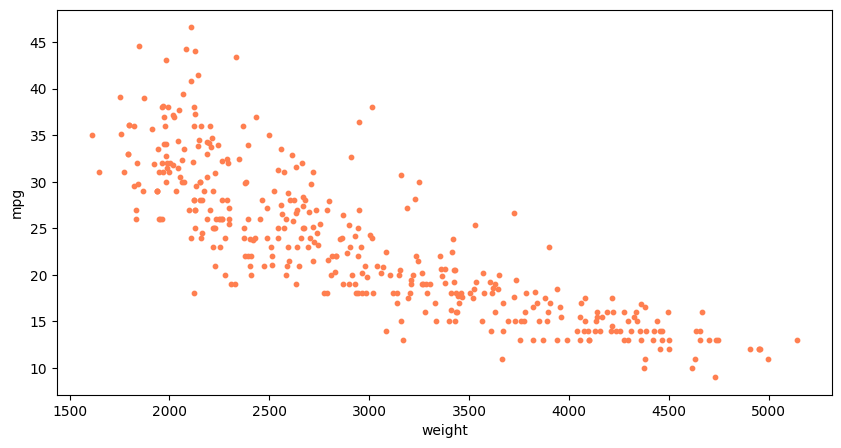

In [179]:
# %%
# 속성 선택
# 속성 (feature 또는 variable) 선택

# 분석에 활용할 열(속성) 선택(연비, 실린더, 출력, 중량)
ndf=df[["mpg","cylinders","horsepower","weight"]]
print(ndf.head())

# 종속 변수 Y인 "연비(mpg)"와 다른 변수 간의 선형관계를 그래프(산점도)로 확인
# Matplotlib으로 산점도 그리기
ndf.plot(kind="scatter", x="weight", y="mpg", c="coral", s=10, figsize=(10,5))
plt.show()
plt.close()


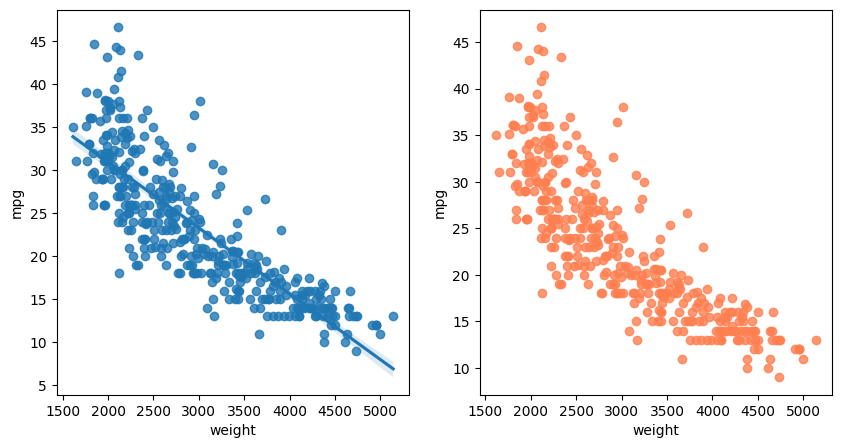

In [180]:
# %%
# seaborn으로 산점도 그리기
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.regplot(x="weight",y="mpg", data=ndf, ax=ax1) # 회귀선 표시
sns.regplot(x="weight",y="mpg",data=ndf, ax=ax2,fit_reg=False,color="coral") #회귀선 미표시
plt.show()
plt.close()

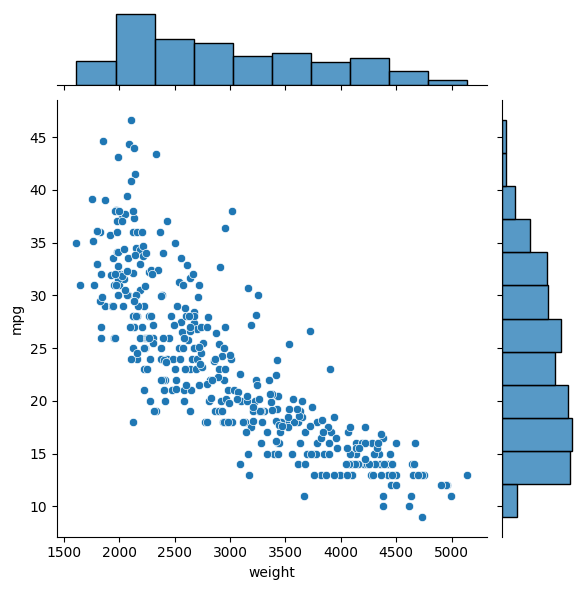

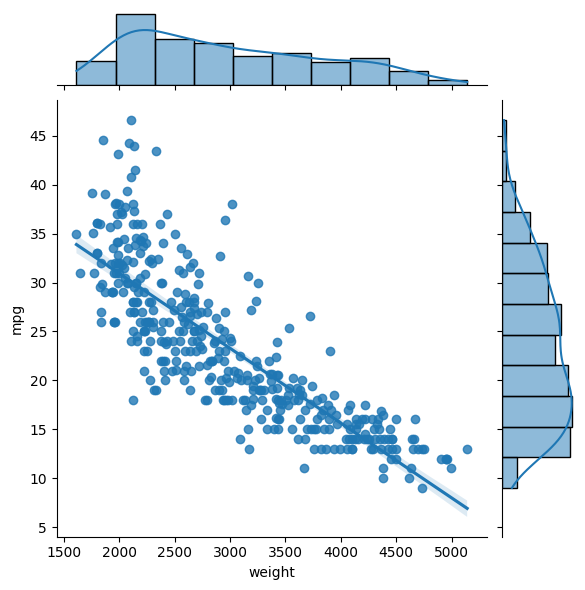

In [181]:
# %%
# seaborn 조인트 그래프 - 산점도, 히스토그램
sns.jointplot(x="weight", y="mpg", data=ndf) # 회귀선 없음
sns.jointplot(x="weight", y="mpg", data=ndf, kind="reg") # 회귀선 표시
plt.show()
plt.close()

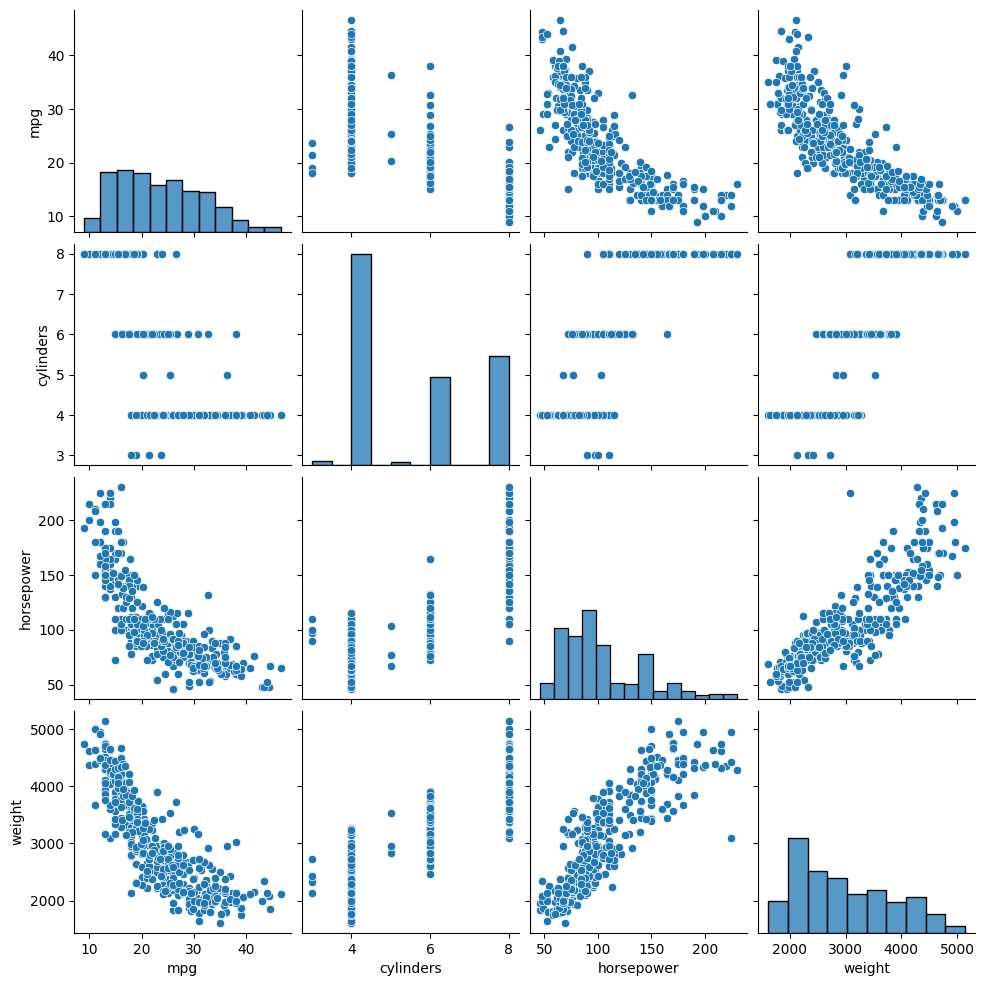

In [182]:
# %%
# seaborn pariplot으로 두 변수 간의 모든 경우의 수 그리기
grid_ndf = sns.pairplot(ndf)
plt.show()
plt.close()

In [183]:
# %%
# 속성(변수) 선택
X=ndf[["weight"]] # 독립 변수 X
y=ndf["mpg"] # 종속 변수 Y

# train data와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, # 독립 변수
                                                   Y, # 종속 변수
                                                   test_size=0.3, # 검증 30%
                                                   random_state=10) # 랜덤 추출 값
print("train data 개수: ", len(X_train))
print("test data 개수: ", len(X_test))

train data 개수:  274
test data 개수:  118


In [184]:
# %%
# 단순회귀분석 모형 만들기 - sklearn 사용
# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()

# train data를 가지고 모형 학습
lr.fit(X_train, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
r_square= lr.score(X_test,y_test)
print(r_square)

0.6822458558299322


In [185]:
# %%

# 회귀식의 기울기
print("기울기 a: ", lr.coef_)

# 회귀식의 y절편
print("y절편 b", lr.intercept_)



기울기 a:  [[-0.00775343]]
y절편 b [46.71036626]


<ipython-input-197-eaa5219c14cc>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y, hist = False, label = "y")
<ipython-input-197-eaa5219c14cc>:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(y_hat, hist = False, label ="y_hat", ax = ax1)


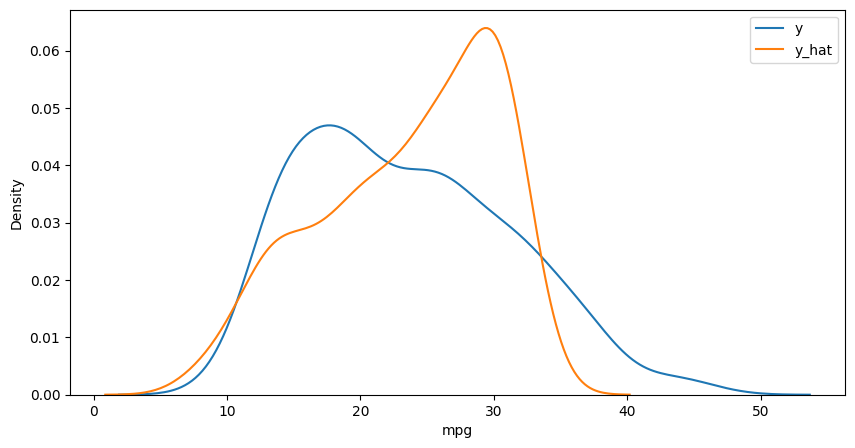

In [197]:
# %%

# # 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교
# y_hat = lr.predict(X)

# plt.figure(figsize=(10,5))
# ax1=sns.kdeplot(y,label="y")
# ax2=sns.kdeplot(y_hat, label="y_hat",ax=ax1)
# plt.legend()
# plt.show()

# # 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교
y_hat = lr.predict(X)

plt.figure(figsize = (10, 5))
ax1 = sns.distplot(y, hist = False, label = "y")
# # 실제 y값

ax2 = sns.distplot(y_hat, hist = False, label ="y_hat", ax = ax1)
# 예측한 y값

plt.legend()
plt.show()

# 다항회귀분석

In [189]:
# %%
# 다항회귀분석
# 기본 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [190]:
# %%
# 다항 회귀분석
# CSV 파일을 데이터프레임으로 변환
df = pd.read_csv(r"/content/drive/MyDrive/BDA/part3/auto-mpg.csv", header=None)

# 열 이름 지정
df.columns=["mpg","cylinders","displacement","horsepower","weight",
            "acceleration","model year","origin","name"]

# horsepower 열의 자료형 변경(문자열 -> 숫자)

df["horsepower"].replace("?",np.nan,inplace=True) #?을 np.nan으로 변경
df.dropna(subset=["horsepower"],axis=0,inplace=True) #누락 데이터 행 삭제
df["horsepower"]= df["horsepower"].astype("float") # 문자열을 실수형으로 변환

# 분석에 활용할 열(속성) 선택(연비, 실린더, 출력, 중량)
ndf = df[["mpg","cylinders","horsepower","weight"]]

# ndf 데이터를 train data와 test data로 구분(7:3 비율)
X=ndf[["weight"]] # 독립 변수 X
y=ndf["mpg"] # 종속 변수 y

# train data와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

print("훈련 데이터: ", X_train.shape)
print("검증 데이터: ", X_test.shape)

훈련 데이터:  (274, 1)
검증 데이터:  (118, 1)


In [191]:
# %%
# 다항 회귀 분석
# 비선형회귀분석 모형 - sklearn 사용
from sklearn.linear_model import LinearRegression # 선형회귀분석
from sklearn.preprocessing import PolynomialFeatures # 다항식 변환

# 다항식 변환
poly = PolynomialFeatures(degree=2) # 2차항 적용 
X_train_poly=poly.fit_transform(X_train) # X_train 데이터를 2차항으로 변형

print("원 데이터: ", X_train.shape)
print("2차항 변환 데이터: ", X_train_poly.shape)


원 데이터:  (274, 1)
2차항 변환 데이터:  (274, 3)


In [192]:
# %%
# train data를 가지고 모형 학습
pr = LinearRegression()
pr.fit(X_train_poly, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
x_test_poly=poly.fit_transform(X_test) # X_test 데이터를 2차항으로 변형
r_square = pr.score(x_test_poly, y_test)
print(r_square)

0.708700926297548


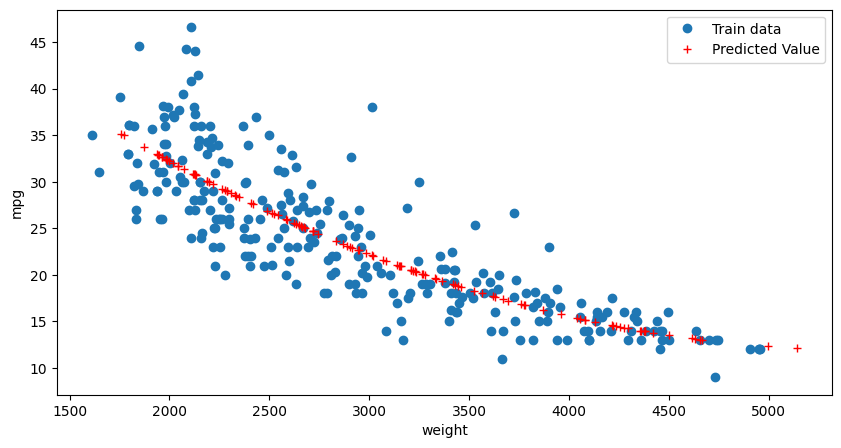

In [193]:
# %%
# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력

y_hat_test = pr.predict(x_test_poly)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.plot(X_train,y_train,'o',label="Train data") # 데이터 분포
ax.plot(X_test,y_hat_test,'r+',label="Predicted Value") # 모형이 학습한 회귀선
ax.legend(loc="best")
plt.xlabel("weight")
plt.ylabel("mpg")
plt.show()
plt.close()

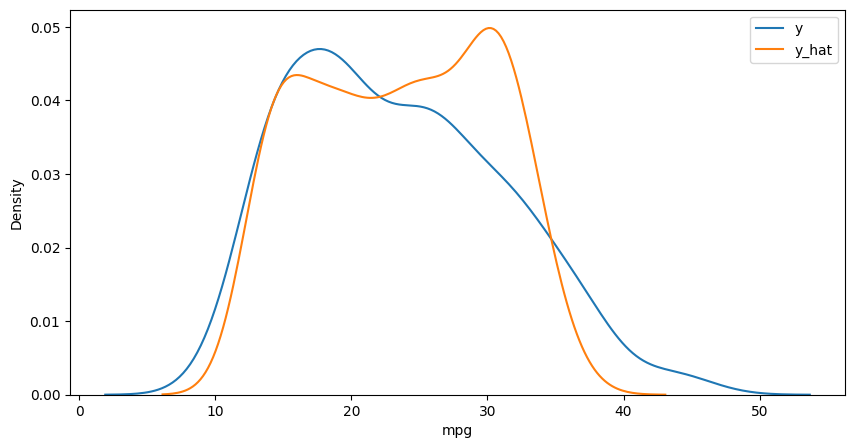

In [195]:
# %%
# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교
X_ploy = poly.fit_transform(X)
y_hat = pr.predict(X_ploy)

plt.figure(figsize=(10,5))

ax1 = sns.kdeplot(y,label="y")
ax2 = sns.kdeplot(y_hat, label="y_hat",ax=ax1)
# ax1 = sns.distplot(y, hist = False, label = "y")
# ax2 = sns.distplot(y_hat, hist = False, label ="y_hat", ax = ax1)
plt.legend()
plt.show()